# SCC0275: Introdução a Ciência de Dados - 2o Semestre de 2021
# SCC0275 - Exercício 4

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Nro do grupo:

Alunos:


1.   Éverton Luís Mendes da Silva (10728171)


No dataset que será utilizado nesse exercício, cada elemento representa uma transação com cartões de crédito. 

A base possui 30 atributos. `Time` representa o tempo em segundos desde a primeira transação da base. `Amount` corresponde ao valor da transação.

Outros 28 atributos numéricos anonimizados também são fornecidos, com 1 variável (`Class`) de saída onde 1 significa fraude e 0 transação normal.

**Esse exerício possui material complementar ("Undersampling e Oversampling")**

**Esse exerício possui material complementar ("Undersampling e Oversampling")**

### Questão 01.
Carregue o dataset `creditcard_sampled.csv` e mostre a distribuição das classes:

*   Via histograma
*   Exibindo o número de ocorrências de cada classe



In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [124]:
dados = pd.read_csv('creditcard_sampled.csv', index_col=0)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10492 entries, 541 to 87896
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10492 non-null  float64
 1   V1      10492 non-null  float64
 2   V2      10492 non-null  float64
 3   V3      10492 non-null  float64
 4   V4      10492 non-null  float64
 5   V5      10492 non-null  float64
 6   V6      10492 non-null  float64
 7   V7      10492 non-null  float64
 8   V8      10492 non-null  float64
 9   V9      10492 non-null  float64
 10  V10     10492 non-null  float64
 11  V11     10492 non-null  float64
 12  V12     10492 non-null  float64
 13  V13     10492 non-null  float64
 14  V14     10492 non-null  float64
 15  V15     10492 non-null  float64
 16  V16     10492 non-null  float64
 17  V17     10492 non-null  float64
 18  V18     10492 non-null  float64
 19  V19     10492 non-null  float64
 20  V20     10492 non-null  float64
 21  V21     10492 non-null  float64
 

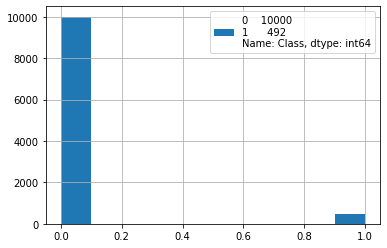

In [125]:
dados['Class'].hist(label=str(dados['Class'].value_counts()))
plt.legend()



---

### Questão 02.

Separe o conjunto de dados em variáveis de entrada e variável alvo.

* Dica: separe os dados em **DataFrames** distintos para facilitar as operações.

In [128]:
features=dados.drop(columns='Class')
targets=dados['Class']

### Atenção
Para as próximas questões, atente-se aos tipos de dados esperados por cada função. Caso necessário, altere-os conforme for melhor para sua implementação.



---

### Questão 03.

Crie uma função que aplique a técnica de subamostragem aleatória nesse conjunto de dados. 
- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função deve retornar um novo conjunto onde todas as classes devem ter o número de ocorrências da classe com **menor representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

In [129]:
def undersample(inputs: pd.DataFrame, targets: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):

  min_sample=min(targets.value_counts().tolist())
  
  undersampled_data=pd.DataFrame(columns=inputs.columns)
  undersampled_targets=pd.DataFrame()

  for class_type in targets.value_counts().index:

    indices_class = np.where(targets== class_type)[0]

    indices_atrr_sample = np.random.choice(a=indices_class, size=min_sample, replace=False)
    undersampled_data=undersampled_data.append(inputs.iloc[indices_atrr_sample])
    undersampled_targets=undersampled_targets.append(targets.iloc[indices_atrr_sample].tolist())

  
  return undersampled_data, undersampled_targets

In [130]:
df_features, df_targets=undersample(features, targets)

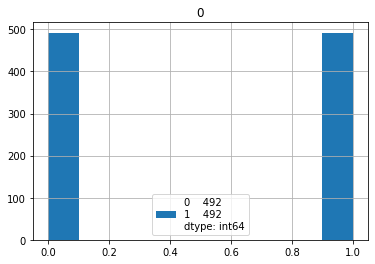

In [132]:
df_targets.hist(label=str(df_targets.value_counts()))
plt.legend()

In [133]:
df_targets[df_targets==0].value_counts()[0]

492



---

### Questão 04.

Crie uma função que aplique a técnica de superamostragem aleatória nesse conjunto de dados. 

- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função deve receber como entrada a base original e retornar um novo conjunto de dados onde todas as classes devem ter o número de ocorrências da classe com **maior representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

In [135]:
def oversample(inputs: pd.DataFrame, targets: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame): 

  max_sample=max(targets.value_counts().tolist())
  
  oversampled_data=pd.DataFrame(columns=inputs.columns)
  oversampled_targets=pd.DataFrame()

  for class_type in targets.value_counts().index:

    if targets[targets==class_type].value_counts().tolist()[0]==max_sample:

      indices_class = np.where(targets== class_type)[0]

      indices_atrr_sample = np.random.choice(a=indices_class, size=max_sample, replace=False)
      oversampled_data=oversampled_data.append(inputs.iloc[indices_atrr_sample])
      oversampled_targets=oversampled_targets.append(targets.iloc[indices_atrr_sample].tolist())
    
    else:

      indices_class = np.where(targets== class_type)[0]

      indices_atrr_sample = np.random.choice(a=indices_class, size=max_sample, replace=True)
      oversampled_data=oversampled_data.append(inputs.iloc[indices_atrr_sample])
      oversampled_targets=oversampled_targets.append(targets.iloc[indices_atrr_sample].tolist())


  return oversampled_data, oversampled_targets

In [136]:
df_features, df_targets=oversample(features, targets)

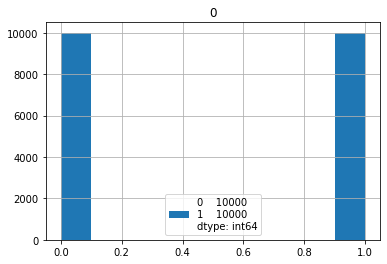

In [137]:
df_targets.hist(label=str(df_targets.value_counts()))
plt.legend()



---

### Questão 05.
- Utilize o KFold com K = 10 no conjunto de dados `StratifiedKFold`. 

- Complete a função *model_tester* de forma que a base seja alterada caso uma função de amostragem seja passada como parâmetro.

- Normalize as **variáveis de entrada** entre 0 e 1 (`sklearn.preprocessing.MinMaxScaler`). Lembre-se que não podemos utilizar dados do conjunto de teste durante o *fit* do objeto *scaler*

- Teste o score de classificação, utilizando a função `model_tester` abaixo, para cada função criada nas questões anteriores utilizando os dados normalizados.

- Compare os resultados das diferentes técnicas de amostragem.

In [121]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def model_tester(inputs, targets, sampler_func=None, weights=None):
  """
  Executa classificação do conjunto de dados passado
  ---------------------------------------------------------------
  inputs:     DataFrame contendo variáveis de entrada (X)
  target:     DataFrame contendo variáveis alvo (y)  
  sampler_func: Uma função que irá balancear os dados de acordo com a
                distribuição das classes
  weights:    Dicionário com o peso de cada classe. Cada chave do dicionário é
              uma classe, e seu valor o associado a essa classe. Por exemplo, se
              tivermos duas classes 0 e 1 com mesmo peso, teremos o dicionario:
              {0: 0.5, 1: 0.5}

  ---------------------------------------------------------------
  Realiza a classificação em 3 modelos (SVM com kernel linear, 
  SVM com kernel polinomial de grau 3, Árvore de decisão)
  O desempenho é calculado utilizando a acurácia balanceada.
  """
  testes = {
    "SVM Linear" : SVC(kernel='linear', class_weight=weights),
    "SVM Polinomial grau 3" : SVC(kernel='poly', degree=3, class_weight=weights),
    "Decision Tree (gini)" : DecisionTreeClassifier(criterion='gini', class_weight=weights)    
  }
  for teste in testes:
    clf = testes[teste]
    scores = []    
   
    skf = StratifiedKFold(n_splits=10) 
    for train_index, test_index in skf.split(inputs, targets):

      # Separando exemplos de treino e teste
      x_train, x_test = inputs.iloc[train_index], inputs.iloc[test_index]
      y_train, y_test = targets.iloc[train_index], targets.iloc[test_index]

      # Aplicando a amostragem
      # a amostragem é aplicada no conjunto de TREINO. Deve-se manter o conjunto de teste intacto
      if sampler_func is not None:
        x_train, y_train = sampler_func(x_train, y_train)
        x_train, y_train = x_train.values, y_train.values
      else:
        x_train, y_train = x_train.values, y_train.values

      # transformando um vetor coluna em vetor 1D (linha) para evitar Warnings
      y_train, y_test = np.ravel(y_train), np.ravel(y_test) 

      # Aplique seu preprocessamento aqui
      ######
      scaler= MinMaxScaler().fit(x_train)
      x_train= scaler.transform(x_train) 
      x_test = scaler.transform(x_test)
      ######

      clf.fit(x_train, y_train)
      y_pred = clf.predict(x_test)

      scores.append(balanced_accuracy_score(y_test, y_pred, sample_weight=weights)) 

    print("Score do classificador '%s': %.2f" % (teste, np.mean(scores)*100))

In [122]:
print("--- original data ---")
model_tester(features, targets)

print("--- oversampled_data ---")
model_tester(features, targets, oversample)

print("--- undersampled_data ---")
model_tester(features, targets, undersample)

--- original data ---
Score do classificador 'SVM Linear': 71.77
Score do classificador 'SVM Polinomial grau 3': 68.22
Score do classificador 'Decision Tree (gini)': 76.25
--- oversampled_data ---
Score do classificador 'SVM Linear': 73.08
Score do classificador 'SVM Polinomial grau 3': 67.75
Score do classificador 'Decision Tree (gini)': 80.30
--- undersampled_data ---
Score do classificador 'SVM Linear': 60.11
Score do classificador 'SVM Polinomial grau 3': 69.84
Score do classificador 'Decision Tree (gini)': 68.45
